# Sampling effect on the performance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
cm = 1/2.54  # centimeters in inches

In [2]:
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)
data = {}
dataframe = pd.DataFrame()
models = ["mace_ffn", "unimol_ffn", "mace_gnn", "unimol_gnn"]
samplings = ["random_42", "morgan_42", "hausdorff_encodings_42"]
SAMPLING_LABELS = dict(zip(samplings,["Random", "Tanimoto / Morgan", " Hausdorff / Transfered Encodings", ]))
for sampling in samplings:
    data[sampling] = {model: pd.read_csv(f"{sampling}/{model}/{model}_low_data.csv") for model in models}
    for model in models:
        df = pd.read_csv(f"{sampling}/{model}/{model}_low_data.csv")
        df["model"] = model
        df["Sampling"] = SAMPLING_LABELS[sampling]
        dataframe = pd.concat([dataframe,
                df], ignore_index=True)



In [3]:
MAEs_full = {
    "mace_gnn" : 1.34,
    "unimol_gnn": 1.51,
    "mace_ffn": 1.68,
    "unimol_ffn": 2.07

}
MODELS = {
    "mace_gnn" : "MACE GNN",
    "unimol_gnn": "Uni-Mol GNN",
    "mace_ffn": "MACE FFN",
    "unimol_ffn": "Uni-Mol FFN"

}

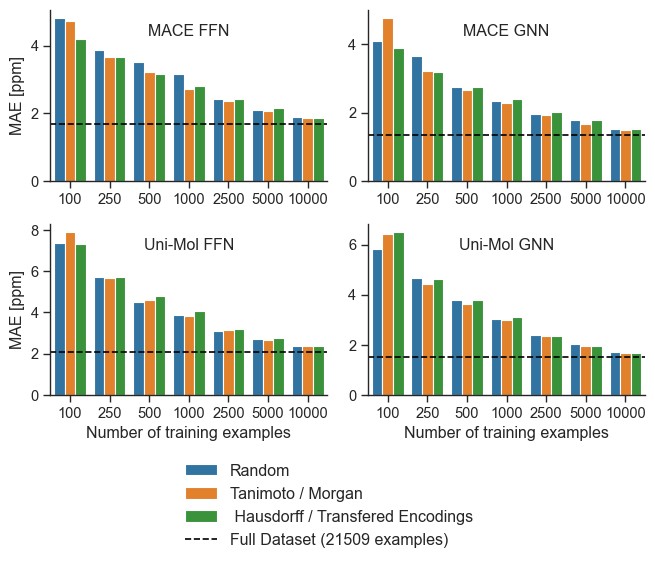

In [4]:
g = sns.catplot(
    data=dataframe, x="num_train_examples", y="MAE", hue="Sampling", col="model",
    kind="bar", height=17.1*cm, aspect=0.7, legend="auto", sharey=False, col_wrap=2, col_order=["mace_ffn", "mace_gnn", "unimol_ffn", "unimol_gnn"],
    sharex=False,
)
g.set()
g.set_axis_labels("Number of training examples", "MAE [ppm]",)
for ax in g.axes_dict.values():
    model = ax.get_title().split("=")[1][1:]
    ax.set_title(MODELS[model],y=0.8, fontsize="medium")
    ax.axhline(y=MAEs_full[model],xmin=0.0,xmax=1.0,color="black",linestyle="dashed",label="Full Dataset (21509 examples)")
    handles, labels = ax.get_legend_handles_labels()
g.legend.remove()
g.add_legend(dict(zip(labels,handles)), loc="center", bbox_to_anchor=(0.5, -0.1),
          bbox_transform=g.figure.transFigure,fontsize="medium", title_fontsize="xx-small")
g.figure.set_size_inches(17.1*cm, 17.1*0.7*cm)
g.figure.tight_layout()
g.figure.savefig("sampling.pdf", bbox_extra_artists=(g.legend,), bbox_inches='tight',dpi=800)
g.figure.savefig("sampling.tiff", bbox_extra_artists=(g.legend,), bbox_inches='tight',dpi=800)

